In [1]:
# %%javascript
# IPython.OutputArea.auto_scroll_threshold = 9999

In [2]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#plt.style.use('ggplot')
%matplotlib inline

In [3]:
pd.set_option('display.max_rows', 50)
#pd.set_option('display.max_columns', 100)

# 1.Lecture des données (Fichiers Incidents)

In [26]:
incidents_folder_path: str = r'H:\CollaborativeProjects\DataScientest\Jan24_cds_Pompiers\data\raw\london-fire-brigade-incident-records'

In [27]:
incident_data_from_2009_to_2017 = pd.read_csv(os.path.join(incidents_folder_path, "LFB Incident data from 2009 - 2017.csv"),
                                            date_format='%d-%b-%y',
                                            parse_dates=['DateOfCall'],
                                            dayfirst=True,
                                            sep=",")

incident_data_from_2018_to_onwards = pd.read_csv(os.path.join(incidents_folder_path, "LFB Incident data from 2018 onwards.csv"),
                                                date_format='%d-%b-%y',
                                                parse_dates=['DateOfCall'],
                                                dayfirst=True,
                                                sep=",",
                                                encoding='unicode_escape')

C:\Users\courio\AppData\Local\Temp\ipykernel_13588\2947356504.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  incident_data_from_2009_to_2017 = pd.read_csv(os.path.join(incidents_folder_path, "LFB Incident data from 2009 - 2017.csv"),


In [28]:
# vérifier si nous avons le même nombre de colonnes pour le merge.
coluns_intersect: int = len((set(incident_data_from_2009_to_2017.columns) & set(incident_data_from_2018_to_onwards.columns)))
if(len(incident_data_from_2009_to_2017.columns) == len(incident_data_from_2018_to_onwards.columns) 
   and coluns_intersect == len(incident_data_from_2009_to_2017.columns)):
    print("Nous avons le même nombre de colonnes.")

#display(incident_data_from_2009_to_2017.head(5))
#display(incident_data_from_2009_to_2017.shape)
#display(incident_data_from_2018_to_onwards.head(5))
#display(incident_data_from_2018_to_onwards.shape)

# Concatenons les 2 DataFrames verticalement.
incidents_df = pd.concat([incident_data_from_2009_to_2017, incident_data_from_2018_to_onwards], axis=0)
incidents_df.head()

Nous avons le même nombre de colonnes.


,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls
0,235138081.0,2009-01-01,2009,00:00:37,0,Special Service,Special Service,RTC,Road Vehicle,Car,...,319.0,Battersea,342.0,Clapham,2.0,2.0,2,60,255,1.0
1,1091.0,2009-01-01,2009,00:00:46,0,Special Service,Special Service,Assist other agencies,Outdoor,Lake/pond/reservoir,...,NaN,NaN,NaN,NaN,NaN,NaN,1,60,255,1.0
2,2091.0,2009-01-01,2009,00:03:00,0,Fire,Secondary Fire,NaN,Outdoor,Road surface/pavement,...,308.0,Edmonton,NaN,NaN,1.0,1.0,1,60,255,2.0
3,3091.0,2009-01-01,2009,00:04:27,0,Fire,Secondary Fire,NaN,Outdoor,Domestic garden (vegetation not equipment),...,210.0,Hillingdon,NaN,NaN,1.0,1.0,1,60,255,2.0
4,5091.0,2009-01-01,2009,00:05:39,0,Fire,Secondary Fire,NaN,Outdoor,Cycle path/public footpath/bridleway,...,233.0,Holloway,250.0,Holloway,1.0,2.0,2,60,255,1.0


In [29]:
incidents_df.shape

(1691361, 39)

Ce dataset **incidents** après merge contient **1691361 lignes et 39 colonnes**

### Acronyms

In [22]:
metadata = pd.read_excel(os.path.join(incidents_folder_path, "Metadata.xlsx"), usecols=['Column', 'Description2']).rename(columns={'Column': 'Variable', 'Description2': 'Description'})
display(metadata)

,Variable,Description
0,IncidentNumber,Numéro d'incident du LFB
1,DateOfCall,Date de l'appel au 999
2,CalYear,Année de l'appel au 999
3,TimeOfCall,Temps de l'appel au 999
4,HourOfCall,Heure de l'appel au 999
5,IncidentGroup,Catégorie d'incident de haut niveau
6,StopCodeDescription,Catégorie d'incident détaillée
7,SpecialServiceType,Détails supplémentaires pour les catégories d'...
8,PropertyCategory,Descripteur de propriété de haut niveau
9,PropertyType,Description détaillé de la propriété


# 2. Exploratory Data Analysis /Analyse exploratoire des données

## Objectif :

## Checklist de base
#### Analyse de Forme :
- **variable target** : FirstPumpArriving_AttendanceTime, SecondPumpArriving_AttendanceTime
- **lignes et colonnes** : 1691361, 39
- **types de variables** : qualitatives : 20, quantitatives : 19
- **Analyse des valeurs manquantes** :
    - Il y'a quelques variables qui ont beaucoup de NaN (moitié des variables > 90% de NaN), dont la variable FirstPumpArriving_AttendanceTime, SecondPumpArriving_AttendanceTime (On supprimera les lignes NA pour ces cas.)
    - Il faudra checker le cas DateOfCall avec les NaN

#### Analyse de Fond :
- **Visualisation de la target** :
    - 10% de positifs (558 / 5000)
    
    
    
- **Signification des variables** :
    -  variables continues standardisées, skewed (asymétriques), test sanguin
    - age quantile : difficile d'interpreter ce graphique, clairement ces données ont été traitées, on pourrait penser 0-5, mais cela pourrait aussi etre une transformation mathématique. On peut pas savoir car la personne qui a mit ce dataset ne le précise nul part. Mais ca n'est pas tres important
    - variable qualitative : binaire (0, 1), viral, Rhinovirus qui semble tres élevée



- **Relation Variables / Target** :
    - target / blood : les taux de Monocytes, Platelets, Leukocytes semblent liés au covid-19 -> hypothese a tester
    - target/age : les individus de faible age sont tres peu contaminés ? -> attention on ne connait pas l'age, et on ne sait pas de quand date le dataset (s'il s'agit des enfants on sait que les enfants sont touchés autant que les adultes). En revanche cette variable pourra etre intéressante pour la comparer avec les résultats de tests sanguins
    - target / viral : les doubles maladies sont tres rares. Rhinovirus/Enterovirus positif - covid-19 négatif ? -> hypothese a tester ? mais il est possible que la région est subie une épidémie de ce virus. De plus on peut tres bien avoir 2 virus en meme temps. Tout ca n'a aucun lien avec le covid-19
    
    
    
## Analyse plus détaillée

- **Relation Variables / Variables** :
    - blood_data / blood_data : certaines variables sont tres corrélées : +0.9 (a suveiller plus tard)
    - blood_data / age : tres faible corrélation entre age et taux sanguins
    - viral / viral : influenza rapid test donne de mauvais résultats, il fauda peut-etre la laisser tomber
    - relation maladie / blood data : Les taux sanguins entre malades et covid-19 sont différents
    - relation hospitalisation / est malade : 
    - relation hospitalisation / blood : intéressant dans le cas ou on voudrait prédire dans quelle service un patient devrait aller


- **NaN analyse** : viral : 1350(92/8), blood : 600(87/13), both : 90

### hypotheses nulle (H0): 

- Les individus atteints du covid-19 ont des taux de Leukocytes, Monocytes, Platelets significativement différents
    - H0 = Les taux moyens sont ÉGAUX chez les individus positifs et négatifs

- Les individus atteints d'une quelconque maladie ont des taux significativement différents


    

In [10]:
incidents_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1691361 entries, 0 to 703081
Data columns (total 39 columns):
 #   Column                                  Dtype         
---  ------                                  -----         
 0   IncidentNumber                          object        
 1   DateOfCall                              datetime64[ns]
 2   CalYear                                 int64         
 3   TimeOfCall                              object        
 4   HourOfCall                              int64         
 5   IncidentGroup                           object        
 6   StopCodeDescription                     object        
 7   SpecialServiceType                      object        
 8   PropertyCategory                        object        
 9   PropertyType                            object        
 10  AddressQualifier                        object        
 11  Postcode_full                           object        
 12  Postcode_district                       object  

In [40]:
# Analyse descriptive des variables continue.
incidents_df.select_dtypes(exclude=['object']).describe()

,DateOfCall,CalYear,HourOfCall,UPRN,USRN,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FirstPumpArriving_AttendanceTime,SecondPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls
count,1691361,1.691361e+06,1.691361e+06,1.550028e+06,1.528490e+06,853807.000000,853807.000000,1.691361e+06,1.691361e+06,853807.000000,853807.000000,1.559702e+06,604911.000000,1.678254e+06,1.678254e+06,1.691361e+06,1.691361e+06,1.691361e+06,1.689515e+06
mean,2016-08-07 02:19:30.122759680,2.016099e+03,1.347415e+01,2.216739e+10,2.030646e+07,530633.993650,180364.044359,5.306637e+05,1.804959e+05,51.451775,-0.118846,3.180479e+02,394.924834,1.367176e+00,1.554516e+00,1.591760e+00,7.632328e+01,3.974395e+02,1.330867e+00
min,2009-01-01 00:00:00,2.009000e+03,0.000000e+00,0.000000e+00,0.000000e+00,503582.000000,155901.000000,5.035500e+05,1.559500e+05,0.000000,-0.510155,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+01,2.550000e+02,1.000000e+00
25%,2012-06-12 00:00:00,2.012000e+03,9.000000e+00,0.000000e+00,2.040096e+07,525198.500000,175988.000000,5.252500e+05,1.761500e+05,51.468933,-0.197280,2.310000e+02,294.000000,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+01,2.600000e+02,1.000000e+00
50%,2016-08-21 00:00:00,2.016000e+03,1.400000e+01,0.000000e+00,2.120124e+07,530796.000000,180982.000000,5.309500e+05,1.810500e+05,51.512882,-0.117025,2.960000e+02,368.000000,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+01,3.280000e+02,1.000000e+00
75%,2020-09-13 00:00:00,2.020000e+03,1.900000e+01,1.001403e+10,2.210116e+07,536833.000000,184935.000000,5.362500e+05,1.851500e+05,51.547736,-0.028804,3.780000e+02,463.000000,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+01,3.520000e+02,1.000000e+00
max,2024-03-31 00:00:00,2.024000e+03,2.300000e+01,2.000044e+11,9.999042e+07,561126.000000,200906.000000,6.111500e+05,3.024500e+05,51.691670,0.322219,1.200000e+03,1200.000000,4.600000e+01,1.060000e+02,9.510000e+02,5.256290e+05,2.277726e+06,3.690000e+02
std,NaN,4.590807e+00,6.246800e+00,4.776722e+10,4.379204e+06,10329.435022,7437.720221,9.721260e+03,7.355635e+03,1.687489,0.148906,1.388444e+02,153.510240,6.774396e-01,8.372198e-01,1.588198e+00,5.765348e+02,2.724155e+03,1.489883e+00


In [41]:
# Analyse descriptive des variables qualitatives.
incidents_df.select_dtypes(include=['object']).describe()

,IncidentNumber,TimeOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,FRS,IncidentStationGround,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_DeployedFromStation
count,1691361.0,1691361,1691361,1691361,544772,1691361,1691361,1691361,853807,1691361,1691361,1691361,1691361,1691057,1691057,1691057,1691361,1691360,1559691,604904
unique,1691361.0,121658,3,10,21,9,292,11,117966,329,33,33,33,899,1484,1481,1,103,117,114
top,235138081.0,19:11:16,False Alarm,AFA,Effecting entry/exit,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Correct incident location,SW17 0QT,CR0,E09000033,WESTMINSTER,Westminster,E05013808,West End,West End,London,Soho,Soho,Hammersmith
freq,1.0,56,830352,625944,117098,829837,209574,949359,1805,33017,124791,124791,124791,31431,27583,27583,1691361,60179,52793,15561


In [11]:
# Change le type de quelques colonnes et ajoute la colonne MonthOfCall
incidents_df['TimeOfCall'] =  pd.to_datetime(incidents_df['TimeOfCall'], format=r'%H:%M:%S')
incidents_df['MonthOfCall'] = pd.to_datetime(incidents_df['DateOfCall']).dt.month

In [31]:
incidents_df.dtypes.value_counts()

object            20
float64           11
int64              7
datetime64[ns]     1
Name: count, dtype: int64

In [35]:
incidents_df.shape

(1691361, 39)

<Axes: ylabel='count'>

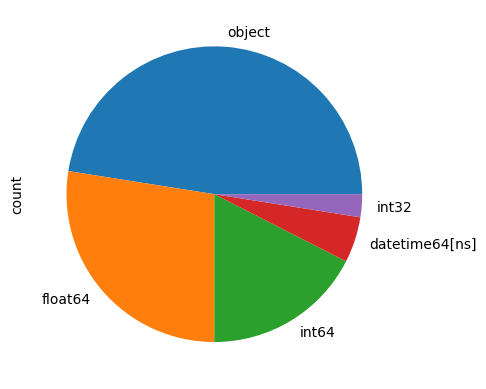

In [12]:
incidents_df.dtypes.value_counts().plot.pie()

Des valeurs manquantes existent la base de données.

In [37]:
incidents_df.isna().sum()

IncidentNumber                                  0
DateOfCall                                      0
CalYear                                         0
TimeOfCall                                      0
HourOfCall                                      0
IncidentGroup                                   0
StopCodeDescription                             0
SpecialServiceType                        1146589
PropertyCategory                                0
PropertyType                                    0
AddressQualifier                                0
Postcode_full                              837554
Postcode_district                               0
UPRN                                       141333
USRN                                       162871
IncGeo_BoroughCode                              0
IncGeo_BoroughName                              0
ProperCase                                      0
IncGeo_WardCode                               304
IncGeo_WardName                               304


In [42]:
#(incidents_df.isna().sum()/incidents_df.shape[0]).sort_values(ascending=True)

Liste des colonnes ayant des valeurs manquantes.

In [39]:
incidents_df.isna().sum()[incidents_df.isna().sum() > 0 ]

SpecialServiceType                        1146589
Postcode_full                              837554
UPRN                                       141333
USRN                                       162871
IncGeo_WardCode                               304
IncGeo_WardName                               304
IncGeo_WardNameNew                            304
Easting_m                                  837554
Northing_m                                 837554
Latitude                                   837554
Longitude                                  837554
IncidentStationGround                           1
FirstPumpArriving_AttendanceTime           131659
FirstPumpArriving_DeployedFromStation      131670
SecondPumpArriving_AttendanceTime         1086450
SecondPumpArriving_DeployedFromStation    1086457
NumStationsWithPumpsAttending               13107
NumPumpsAttending                           13107
NumCalls                                     1846
dtype: int64

In [43]:
def pourcentage_de_valeurs_manquantes(data) -> None:

    nombre_de_lignes = data.shape[0]
    
    for i in range(0, len(data.isna().sum(axis=0))):
        print("Pour la variable", data.isna().sum(axis=0).index[i], "le pourcentage de NaN est de", np.round(data.isna().sum(axis=0)[i]*100/nombre_de_lignes, 2), "%")

In [44]:
# Affichage du pourcentage de valeurs manquantes pour chaque variable de la base de données "lieux".

pourcentage_de_valeurs_manquantes(incidents_df)

C:\Users\courio\AppData\Local\Temp\ipykernel_13588\903605431.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Pour la variable", data.isna().sum(axis=0).index[i], "le pourcentage de NaN est de", np.round(data.isna().sum(axis=0)[i]*100/nombre_de_lignes, 2), "%")


Pour la variable IncidentNumber le pourcentage de NaN est de 0.0 %
Pour la variable DateOfCall le pourcentage de NaN est de 0.0 %
Pour la variable CalYear le pourcentage de NaN est de 0.0 %
Pour la variable TimeOfCall le pourcentage de NaN est de 0.0 %
Pour la variable HourOfCall le pourcentage de NaN est de 0.0 %
Pour la variable IncidentGroup le pourcentage de NaN est de 0.0 %
Pour la variable StopCodeDescription le pourcentage de NaN est de 0.0 %
Pour la variable SpecialServiceType le pourcentage de NaN est de 67.79 %
Pour la variable PropertyCategory le pourcentage de NaN est de 0.0 %
Pour la variable PropertyType le pourcentage de NaN est de 0.0 %
Pour la variable AddressQualifier le pourcentage de NaN est de 0.0 %
Pour la variable Postcode_full le pourcentage de NaN est de 49.52 %
Pour la variable Postcode_district le pourcentage de NaN est de 0.0 %
Pour la variable UPRN le pourcentage de NaN est de 8.36 %
Pour la variable USRN le pourcentage de NaN est de 9.63 %
Pour la variable

<Axes: >

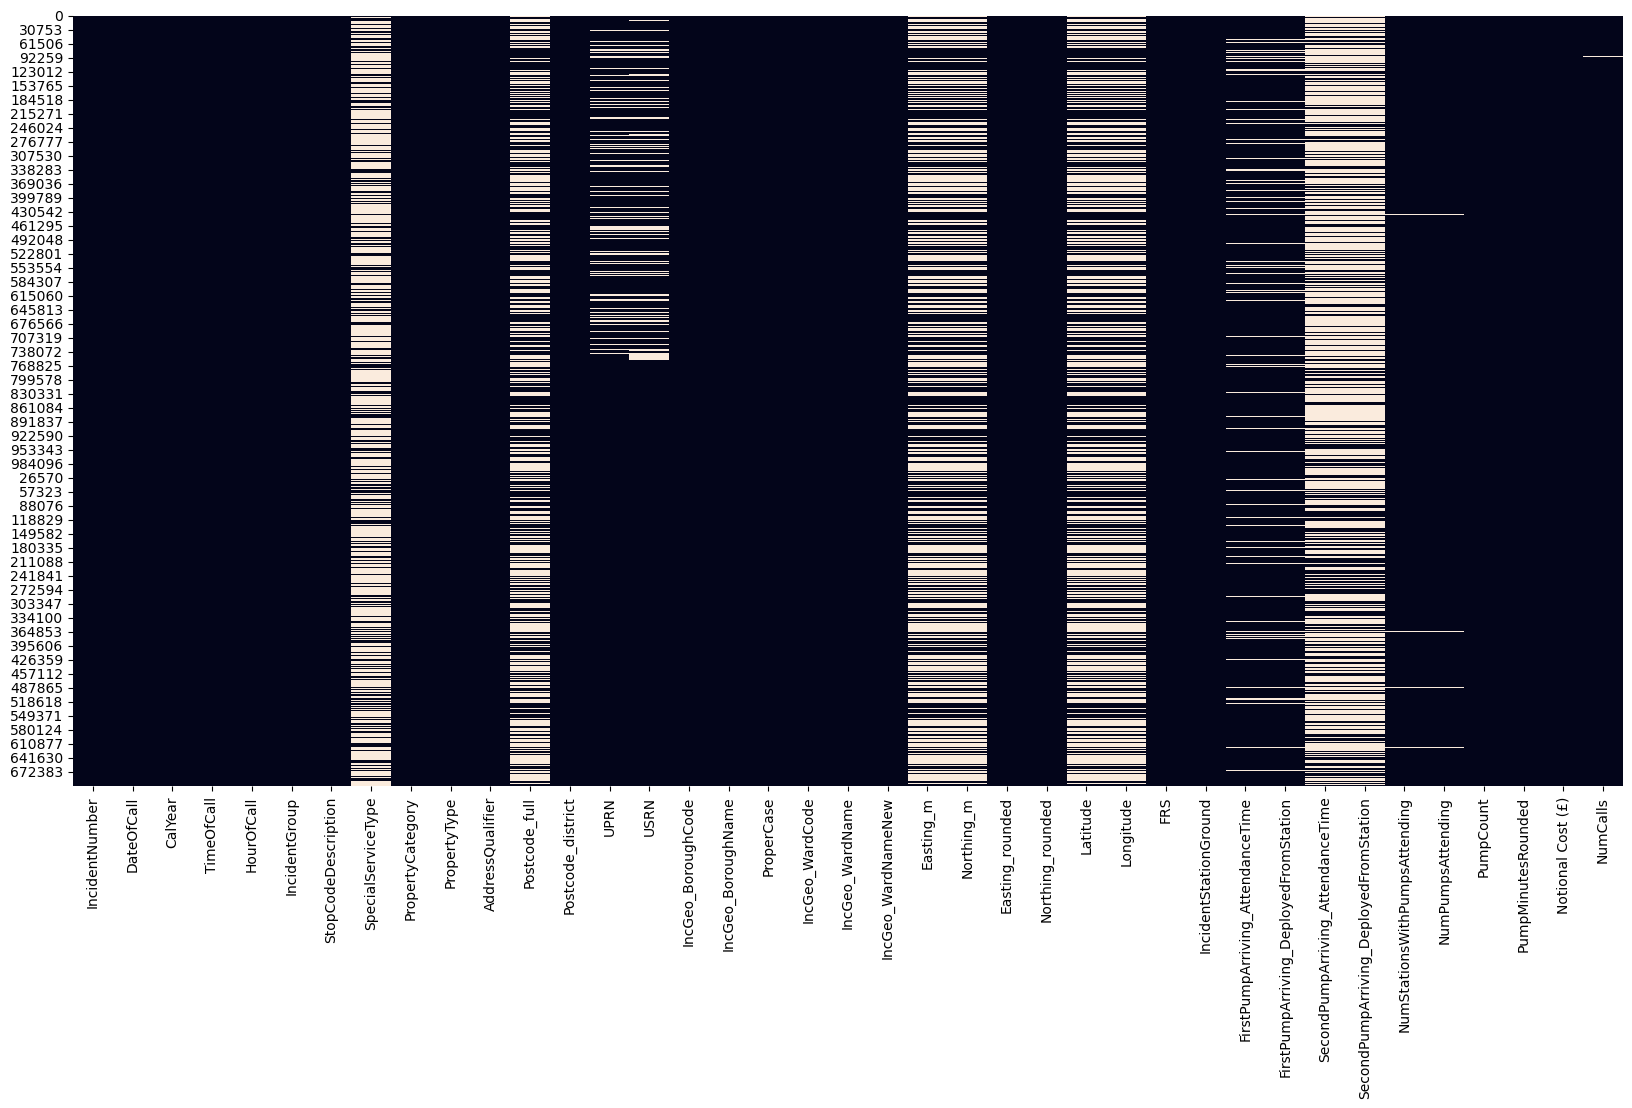

In [30]:
plt.figure(figsize=(20,10))
sns.heatmap(incidents_df.isna(), cbar=False)

In [15]:
incidents_df.describe()

,DateOfCall,CalYear,TimeOfCall,HourOfCall,UPRN,USRN,Easting_m,Northing_m,Easting_rounded,Northing_rounded,...,Longitude,FirstPumpArriving_AttendanceTime,SecondPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls,MonthOfCall
count,1691361,1.691361e+06,1691361,1.691361e+06,1.550028e+06,1.528490e+06,853807.000000,853807.000000,1.691361e+06,1.691361e+06,...,853807.000000,1.559702e+06,604911.000000,1.678254e+06,1.678254e+06,1.691361e+06,1.691361e+06,1.691361e+06,1.689515e+06,1.691361e+06
mean,2016-08-07 02:19:30.122759680,2.016099e+03,1900-01-01 13:58:20.851752704,1.347415e+01,2.216739e+10,2.030646e+07,530633.993650,180364.044359,5.306637e+05,1.804959e+05,...,-0.118846,3.180479e+02,394.924834,1.367176e+00,1.554516e+00,1.591760e+00,7.632328e+01,3.974395e+02,1.330867e+00,6.537394e+00
min,2009-01-01 00:00:00,2.009000e+03,1900-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,503582.000000,155901.000000,5.035500e+05,1.559500e+05,...,-0.510155,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+01,2.550000e+02,1.000000e+00,1.000000e+00
25%,2012-06-12 00:00:00,2.012000e+03,1900-01-01 09:51:35,9.000000e+00,0.000000e+00,2.040096e+07,525198.500000,175988.000000,5.252500e+05,1.761500e+05,...,-0.197280,2.310000e+02,294.000000,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+01,2.600000e+02,1.000000e+00,4.000000e+00
50%,2016-08-21 00:00:00,2.016000e+03,1900-01-01 14:45:41,1.400000e+01,0.000000e+00,2.120124e+07,530796.000000,180982.000000,5.309500e+05,1.810500e+05,...,-0.117025,2.960000e+02,368.000000,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+01,3.280000e+02,1.000000e+00,7.000000e+00
75%,2020-09-13 00:00:00,2.020000e+03,1900-01-01 19:02:02,1.900000e+01,1.001403e+10,2.210116e+07,536833.000000,184935.000000,5.362500e+05,1.851500e+05,...,-0.028804,3.780000e+02,463.000000,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+01,3.520000e+02,1.000000e+00,9.000000e+00
max,2024-03-31 00:00:00,2.024000e+03,1900-01-01 23:59:59,2.300000e+01,2.000044e+11,9.999042e+07,561126.000000,200906.000000,6.111500e+05,3.024500e+05,...,0.322219,1.200000e+03,1200.000000,4.600000e+01,1.060000e+02,9.510000e+02,5.256290e+05,2.277726e+06,3.690000e+02,1.200000e+01
std,NaN,4.590807e+00,NaN,6.246800e+00,4.776722e+10,4.379204e+06,10329.435022,7437.720221,9.721260e+03,7.355635e+03,...,0.148906,1.388444e+02,153.510240,6.774396e-01,8.372198e-01,1.588198e+00,5.765348e+02,2.724155e+03,1.489883e+00,3.410754e+00


### 1.2 Lecture des données "Mobilisation"

In [16]:
## 1.1 Lecture des données "Mobilisation"


In [17]:
df1 = pd.read_csv("H:\\CollaborativeProjects\\DataScientest\\Jan24_cds_Pompiers\\data\\raw\\london-fire-brigade-incident-records\\LFB Incident data from 2009 - 2017.csv")

df1.sample(10)

C:\Users\courio\AppData\Local\Temp\ipykernel_13588\343694789.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("H:\\CollaborativeProjects\\DataScientest\\Jan24_cds_Pompiers\\data\\raw\\london-fire-brigade-incident-records\\LFB Incident data from 2009 - 2017.csv")


,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls
583041,174838131.0,22-Dec-13,2013,10:51:17,10,Special Service,Special Service,RTC,Road Vehicle,Van,...,656.0,Hainault,NaN,NaN,1.0,1.0,1,60,290,1.0
794673,023736-27022016,27-Feb-16,2016,19:40:30,19,False Alarm,False alarm - Good intent,NaN,Road Vehicle,Car,...,330.0,Beckenham,NaN,NaN,1.0,1.0,1,60,298,2.0
885099,000608-02012017,02-Jan-17,2017,11:05:58,11,Special Service,Special Service,Flooding,Dwelling,Converted Flat/Maisonette - Up to 2 storeys,...,437.0,Homerton,NaN,NaN,1.0,1.0,1,60,326,1.0
871352,154821-13112016,13-Nov-16,2016,10:18:48,10,False Alarm,AFA,NaN,Non Residential,Secondary school,...,244.0,Chelsea,NaN,NaN,1.0,1.0,1,60,326,1.0
240613,187990101.0,05-Nov-10,2010,23:07:27,23,False Alarm,False alarm - Good intent,NaN,Non Residential,Single shop,...,178.0,Stratford,305.0,Leytonstone,2.0,2.0,2,75,325,1.0
274053,25788111.0,21-Feb-11,2011,07:45:39,7,Special Service,Special Service,Flooding,Dwelling,House - single occupancy,...,404.0,Downham,NaN,NaN,1.0,1.0,1,60,260,1.0
287457,49327111.0,06-Apr-11,2011,12:04:40,12,Special Service,Special Service,Effecting entry/exit,Other Residential,Retirement/Old Persons Home,...,350.0,Kentish Town,NaN,NaN,1.0,1.0,1,60,260,1.0
226685,163321101.0,24-Sep-10,2010,22:02:17,22,Fire,Secondary Fire,NaN,Outdoor,Heathland,...,232.0,Plumstead,NaN,NaN,1.0,1.0,1,60,260,1.0
877409,164688-04122016,04-Dec-16,2016,12:28:32,12,False Alarm,AFA,NaN,Non Residential,Single shop,...,646.0,Plumstead,NaN,NaN,1.0,1.0,1,60,326,1.0
48253,81554091.0,15-May-09,2009,08:15:06,8,False Alarm,AFA,NaN,Non Residential,College/University,...,232.0,Clapham,241.0,Clapham,1.0,2.0,2,60,260,1.0


In [18]:
display(df1.columns)
print(len(df1.columns))

Index(['IncidentNumber', 'DateOfCall', 'CalYear', 'TimeOfCall', 'HourOfCall',
       'IncidentGroup', 'StopCodeDescription', 'SpecialServiceType',
       'PropertyCategory', 'PropertyType', 'AddressQualifier', 'Postcode_full',
       'Postcode_district', 'UPRN', 'USRN', 'IncGeo_BoroughCode',
       'IncGeo_BoroughName', 'ProperCase', 'IncGeo_WardCode',
       'IncGeo_WardName', 'IncGeo_WardNameNew', 'Easting_m', 'Northing_m',
       'Easting_rounded', 'Northing_rounded', 'Latitude', 'Longitude', 'FRS',
       'IncidentStationGround', 'FirstPumpArriving_AttendanceTime',
       'FirstPumpArriving_DeployedFromStation',
       'SecondPumpArriving_AttendanceTime',
       'SecondPumpArriving_DeployedFromStation',
       'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount',
       'PumpMinutesRounded', 'Notional Cost (£)', 'NumCalls'],
      dtype='object')

39


In [19]:
df2 = pd.read_csv("H:\\CollaborativeProjects\\DataScientest\\Jan24_cds_Pompiers\\data\\raw\\london-fire-brigade-incident-records\\LFB Incident data from 2018 onwards.csv", encoding='unicode_escape')

df2.sample(10)

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls
587338,068679-16052023,16-May-23,2023,19:47:57,19,False Alarm,AFA,NaN,Other Residential,Retirement/Old Persons Home,...,215.0,Woodside,378.0,Croydon,2.0,2.0,2,60,388,1.0
299358,148460-21112020,21-Nov-20,2020,21:49:10,21,Special Service,Special Service,Lift Release,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,255.0,Bethnal Green,NaN,NaN,1.0,1.0,1,60,346,1.0
395689,140943-19102021,19-Oct-21,2021,8:05:42,8,False Alarm,AFA,NaN,Non Residential,Warehouse,...,508.0,Hayes,NaN,NaN,1.0,1.0,1,60,352,2.0
380200,116652-01092021,1-Sep-21,2021,23:15:19,23,Fire,Primary Fire,NaN,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,...,92.0,Ealing,236.0,Acton,2.0,2.0,2,60,352,1.0
572765,044688-31032023,31-Mar-23,2023,12:38:00,12,False Alarm,AFA,NaN,Dwelling,Converted Flat/Maisonette - Up to 2 storeys,...,218.0,Stoke Newington,546.0,Islington,2.0,2.0,2,60,364,1.0
98988,170628-05122018,5-Dec-18,2018,10:30:41,10,Special Service,Special Service,Effecting entry/exit,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,364.0,Battersea,NaN,NaN,1.0,1.0,1,60,333,1.0
321797,019867-20022021,20-Feb-21,2021,15:11:33,15,False Alarm,False alarm - Good intent,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,181.0,Old Kent Road,291.0,Lambeth,2.0,3.0,3,60,346,1.0
399707,147290-31102021,31-Oct-21,2021,6:40:25,6,False Alarm,AFA,NaN,Other Residential,Retirement/Old Persons Home,...,295.0,Mill Hill,435.0,Hendon,2.0,2.0,2,60,352,1.0
171605,111539-21082019,21-Aug-19,2019,21:02:03,21,Fire,Secondary Fire,NaN,Outdoor Structure,Small refuse/rubbish container,...,208.0,Barking,NaN,NaN,1.0,1.0,1,60,339,2.0
351568,068948-08062021,8-Jun-21,2021,4:08:49,4,Special Service,Special Service,RTC,Road Vehicle,Multiple Vehicles,...,400.0,Barking,NaN,NaN,1.0,1.0,2,60,352,2.0


In [20]:
display(df2.columns)
print(len(df2.columns))

Index(['IncidentNumber', 'DateOfCall', 'CalYear', 'TimeOfCall', 'HourOfCall',
       'IncidentGroup', 'StopCodeDescription', 'SpecialServiceType',
       'PropertyCategory', 'PropertyType', 'AddressQualifier', 'Postcode_full',
       'Postcode_district', 'UPRN', 'USRN', 'IncGeo_BoroughCode',
       'IncGeo_BoroughName', 'ProperCase', 'IncGeo_WardCode',
       'IncGeo_WardName', 'IncGeo_WardNameNew', 'Easting_m', 'Northing_m',
       'Easting_rounded', 'Northing_rounded', 'Latitude', 'Longitude', 'FRS',
       'IncidentStationGround', 'FirstPumpArriving_AttendanceTime',
       'FirstPumpArriving_DeployedFromStation',
       'SecondPumpArriving_AttendanceTime',
       'SecondPumpArriving_DeployedFromStation',
       'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount',
       'PumpMinutesRounded', 'Notional Cost (£)', 'NumCalls'],
      dtype='object')

39


In [21]:
df_diff = pd.concat([df1,df2]).drop_duplicates(keep=False)